# The Spark Foundation - Data Science & Business Analytics Internship

## TASK 6: Prediction using Decision Tree Algorithm

### OBJECTIVE: Create the Decision Tree Classifier and Visualize it Graphically

#### The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

# Author: Sampson Chinonso Ipiankama

### Steps: 

#### Step 1: Import the required packages into our python environment
#### Step 2: Import the dataset and do some EDA on it
#### Step 3: Data visualization on the dataset
#### Step 4: Feature selection and data split
#### Step 5: Modelling and evaluation
#### Step 6: Visualize the decision tree using the graphviz library
#### Step 7: Feed any new/ test data to this classifer to check if it would be able to predict the right class accordingly

# Step 1: Import the required packages into our python environment

In [1]:
import pandas as pd  #To load and manipulate the data
import numpy as np   #To calculate the mean and standard deviation
import seaborn as sns    #To draw graphs
from matplotlib import pyplot as plt     #To draw graphs
from sklearn import tree # To draw a classifcation tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz #To build a classification tree and to export it in DOT format
import graphviz # To draw a graph in DOT format
from sklearn.model_selection import train_test_split # To split the data into training and testing set.
from sklearn.metrics import accuracy_score # To check the accuracy_score of true value and predicted value
from sklearn.metrics import classification_report # To measure the quality of predictions from a classification algorithm

# Step 2: Import the dataset and do some EDA on it

In [2]:
iris = pd.read_csv("Iris.csv")

In [3]:
print(iris.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
iris.info() # To get the shape of object types of our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**The output result shows that there are no missing values.**

In [5]:
iris.describe() #This gives summary statistics for numerical columns in our iris dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.drop(["Id"], axis = 1, inplace = True) # This drops the Id column because it is irrelevant in our analysis

In [7]:
iris.Species.value_counts() #This will return the unique counts of the species of the iris flower contained in our dataset

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**From the result output, we see that the Iris flower has equal number of species data points.**

# Step 3: Data visualization on the dataset

## Pairplot -  This shows the relationship for (n,2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

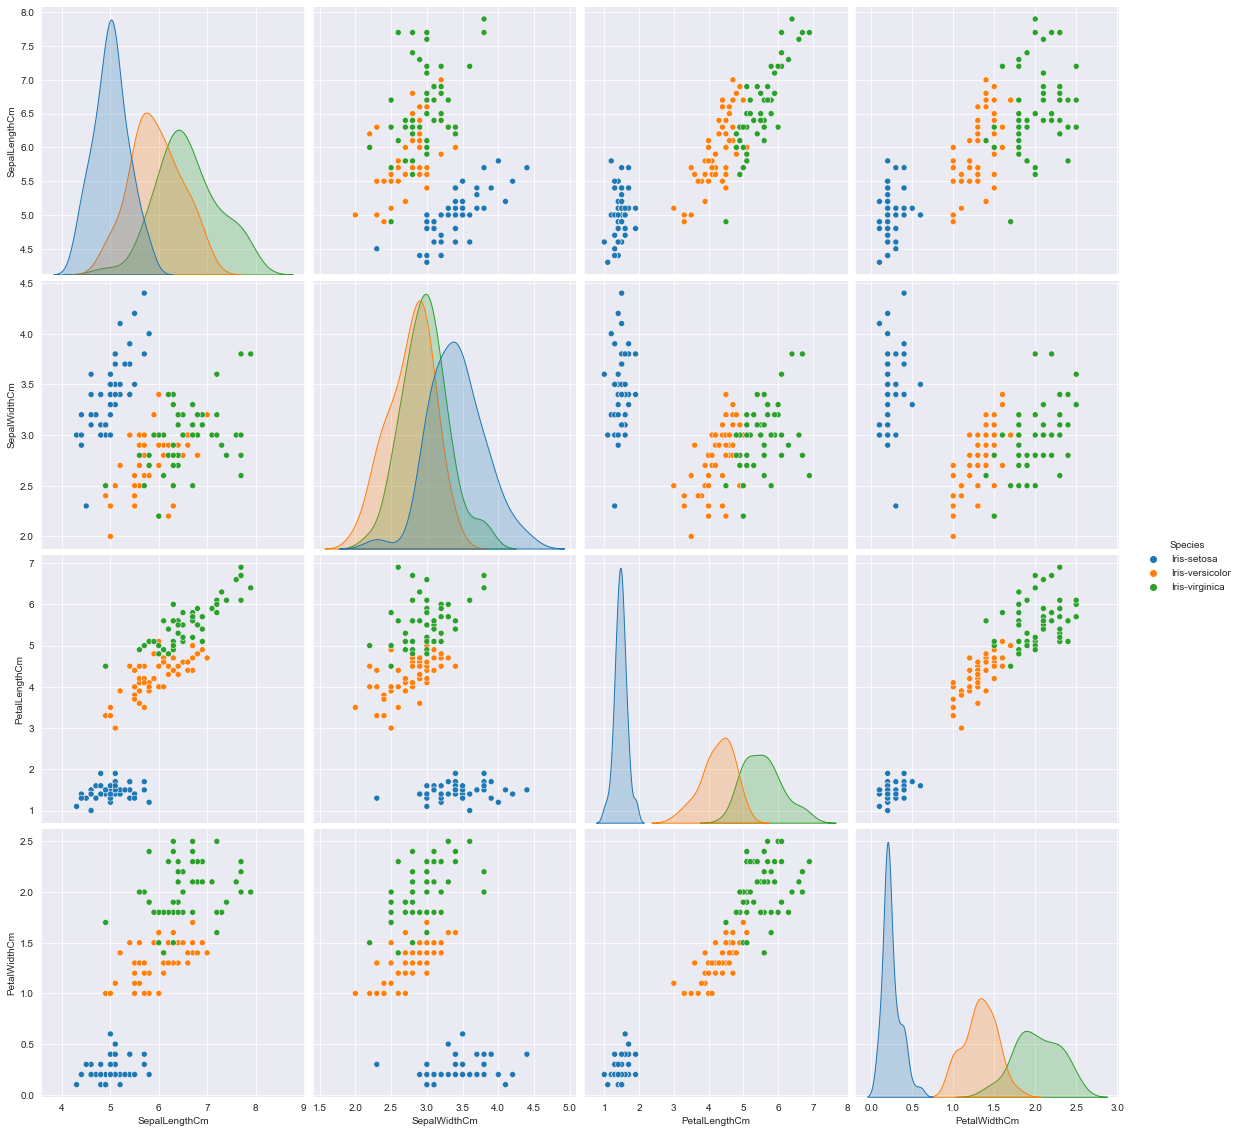

In [8]:
sns.set_style("darkgrid")
sns.pairplot(iris,hue = "Species", height = 4)

# Insights
#### 1. The setosa specie is well separated and easily identifiable. From the pairpliot, we can use the SepalWidthCm and PetalWidthCm, the PetalLenghtCm and the PetalWidthCm to identify the various flower types. 

#### 2. From the above observation, we can build a simple "If-else Conditional Statement" model to classify the flower types. 

#### 3. In addition, we observe that there is some overlap between the versicolor and virginica .

# Step 4: Feature selection and data split

In [9]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
X = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y = iris["Species"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
#let us check the size

print(len(X_train))

120


In [13]:
print(len(X_test))

30


This is correct because there are 150 data points(entries) and we are using 80% to training and 20% for testing.

# Step 5: Modelling and Evaluation

### a)  Train the Model

In [14]:
#Create a decision tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train) # Train the model


### b) Test the Model

In [15]:
predictions = clf_dt.predict(X_test) # Test the model

#### c) Check the precision, recall, f1_score

In [16]:
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**This output gives us a metric of how accurate our model is and this model is 100% accurate. The best possible score we can get is 1.0 and that's what we are getting.**

### d) Check accuracy score

In [17]:
print("The accuracy of the Decision Tree is:",accuracy_score(predictions, y_test))

The accuracy of the Decision Tree is: 1.0


# Step 6: Visualize the Decision Tree

In [18]:
dot_data = export_graphviz(clf_dt,
                          out_file = None,
                          feature_names = iris.columns[1:5],
                          class_names = ["Iris-versicolor", "Iris-virginica", "Iris-setosa"],
                          filled = True,
                          rounded = True,
                          special_characters = True)

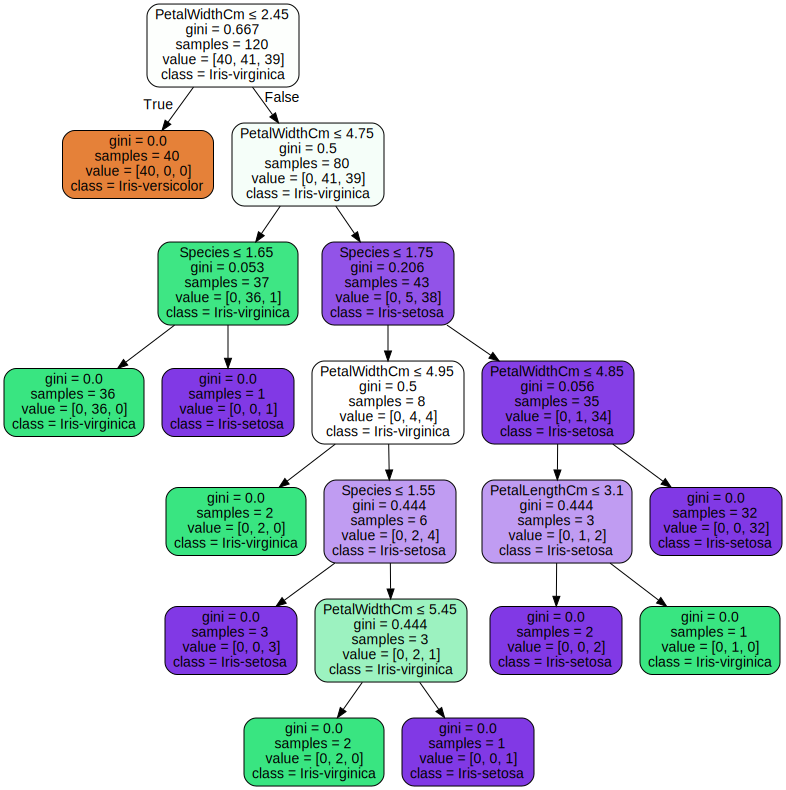

In [19]:
graph = graphviz.Source(dot_data)
graph

# Step 7:  Feed any new/ test data to this classifer to check if it would be able to predict the right class accordingly.

In [20]:
data1 = [[4.6, 3.1, 1.5, 0.2]]
predictions = clf_dt.predict(data1)

In [21]:
predictions

array(['Iris-setosa'], dtype=object)

In [22]:
west1 = [[5.0,4.6,1.4,1.2]]
predictions = clf_dt.predict(west1)
predictions

array(['Iris-setosa'], dtype=object)